**Data Description**


In the process of In Vitro Fertilisation embryos are cultivated in an incubator for 3–5 days until they reach the blastocyst stage in IVF, which is a manual fertilisation method. The best embryos (blastocysts) are chosen based on important morphological characteristics and returned to the uterus of the patient.

The dataset consists of 592 unique blastocyst RGB images. These images can be used to train the model to segment each image into its components. There are five components in each blastocyst that needs to segmented which are trophoblast, blastocoel, Zona pellucida, inner cell mass and the cell background.



In [1]:
#pip install segmentation_models

In [ ]:
#pip install opencv-python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline
import cv2

In [3]:
#provide the dataset path below
train_dir = 'D:/College/Sem 4/Capstone/Capstone_project/data/Train/'
imgs = [fn for fn in os.listdir(f'{train_dir}') if fn.endswith('.jpg')]
def get_data(path,imgs):
    
    data=[]
    for img in imgs:
        file = f'{train_dir}{img}'
        file_image = image.load_img(file)
        img_read = cv2.imread(f'{train_dir}{img}')
        height, width, channel = img_read.shape
        data.append(list([img,file_image,height,width,channel]))
    df = pd.DataFrame(data, columns=['Label','Image','Height','Width','Channel'])
    return df
df=get_data(train_dir,imgs)

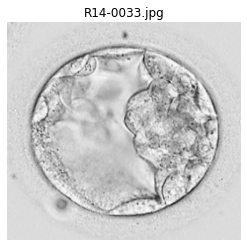

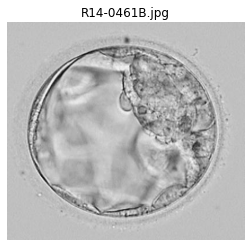

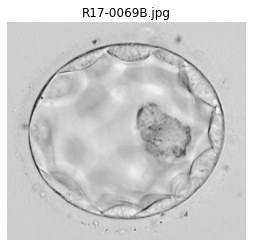

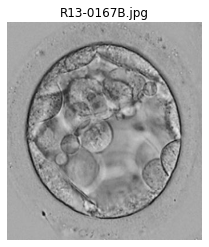

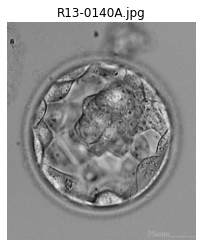

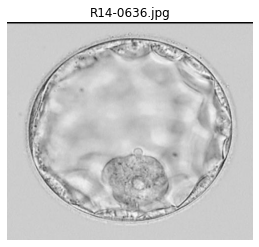

In [4]:
# Ploting random images
def plot_img():
    for i in range(6):
        select_img = np.random.choice(imgs, 6, replace = False)
        file = f'{train_dir}{select_img[i]}'
        file_load=image.load_img(file)
        plt.imshow(file_load)
        plt.title(select_img[i])
        plt.axis('off')
        plt.show()
plot_img()

In [5]:
#need to look into this code to understand image matrix

def img_np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # convert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
np_images = img_np(f'{train_dir}', imgs)

In [6]:
np_images

array([[178., 180., 179., ..., 176., 181., 175.],
       [189., 187., 185., ..., 181., 180., 184.],
       [169., 170., 161., ..., 165., 173., 163.],
       ...,
       [128., 127., 128., ..., 130., 109.,  93.],
       [172., 174., 173., ..., 171., 173., 169.],
       [194., 196., 195., ..., 166., 211., 193.]], dtype=float32)

In [7]:
df

,Label,Image,Height,Width,Channel
0,R12-0090A.jpg,<PIL.Image.Image image mode=RGB size=372x336 a...,336,372,3
1,R12-0090B.jpg,<PIL.Image.Image image mode=RGB size=362x326 a...,326,362,3
2,R12-0105A.jpg,<PIL.Image.Image image mode=RGB size=435x385 a...,385,435,3
3,R12-0105B.jpg,<PIL.Image.Image image mode=RGB size=428x401 a...,401,428,3
4,R12-0169A.jpg,<PIL.Image.Image image mode=RGB size=429x398 a...,398,429,3
...,...,...,...,...,...
587,R18-0318A.jpg,<PIL.Image.Image image mode=RGB size=486x394 a...,394,486,3
588,R18-0318B.jpg,<PIL.Image.Image image mode=RGB size=434x375 a...,375,434,3
589,R18-0321A.jpg,<PIL.Image.Image image mode=RGB size=514x462 a...,462,514,3
590,R18-0321B.jpg,<PIL.Image.Image image mode=RGB size=393x366 a...,366,393,3


**Data Quality**

The dataset consists of 592 RGB images with average height of 398.28 pixel and Width of 435.48 pixel.
The total images has 156 unique height and 196 unique width.
There are 3 channels in each image. The quality of image is good to train the model on sprint semantic segmentation.

In [8]:
df[["Height", "Width", "Channel"]].nunique()

Height     156
Width      196
Channel      1
dtype: int64

In [9]:
df['Height'].mean()

398.2837837837838

In [10]:
df['Width'].mean()

435.48986486486484

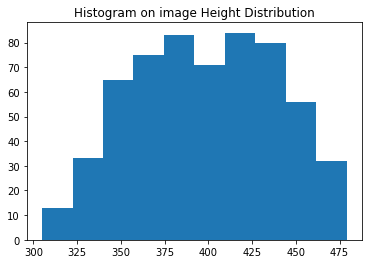

In [12]:
plt.hist(df['Height'])
plt.title("Histogram on image Height Distribution")
plt.show()

The height of images in the dataset is normally distributed and does not have any skewness.

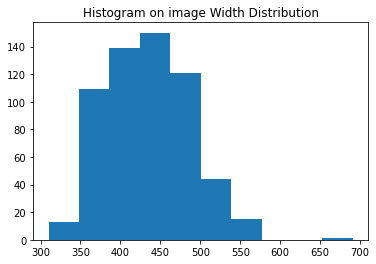

In [13]:
plt.hist(df['Width'])
plt.title("Histogram on image Width Distribution")
plt.show()

The width of the image is normally distributed and we can observe an outlier which can be considered as an exception.

Text(0.5, 1.0, 'Image pixel distributions')

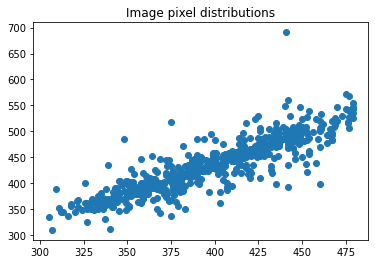

In [14]:
plt.scatter(x=df['Height'],y=df['Width'])
plt.title("Image pixel distributions")

The ablove scatter plot demonstrates the distribution of height and width of the images in the dataset.

In [4]:
#pip install deon

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for deon: filename=deon-0.3.0-py3-none-any.whl size=21371 sha256=41aa80ae8ff5b21118197bb1b51d457acb1af6dbff0933530470b1ae5793c607
  Stored in directory: c:\users\nobin\appdata\local\pip\cache\wheels\7c\77\46\ac90d3f56af95d73c68981fb7ee6f1ae5ab689a53e835fe442
Successfully built deon
Note: you may need to restart the kernel to use updated packages.Successfully installed deon-0.3.0 pyyaml-6.0



**Data Fitness**

The dataset consists of 592 unique images which wouldn't be sufficient for training the model. Therefore we would use Data augmentation to add more training data. Data Augmentation would be used to increase the amount of data by adding slightly modified copies of already existing data.

Yes, we would employ this dataset to answer the research question. 

**Github repository links**

Collaborate Link : https://github.com/anjanapv/AI-ML-Project---Detecting-Embryo-Components-to-Improve-Success-Rate-of-IVF

Nobin Ann Mathew: https://github.com/NobinMath

Anjana Padikkal Veetil: https://github.com/anjanapv

Amal Mathew: https://github.com/Amalmathew5








